In [330]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from IPython.display import Image, display
import matplotlib.pyplot as plt

from utils.preprocess import Preprocess
from utils.visualization import Visualization
from utils.compare import Compare

In [331]:
data = pd.read_csv('task_files/dataset.csv', sep=',')
split_data = pd.DataFrame([json.loads(f) for f in data["fingerprint"].tolist()]).add_prefix('fingerprint_')
full_data = pd.concat([data, split_data], axis=1)

In [3]:
process = Preprocess(full_data)

In [332]:
data_x = full_data.iloc[:,3:]
data_x

,fingerprint_0,fingerprint_1,fingerprint_2,fingerprint_3,fingerprint_4,fingerprint_5,fingerprint_6,fingerprint_7,fingerprint_8,fingerprint_9,...,fingerprint_1014,fingerprint_1015,fingerprint_1016,fingerprint_1017,fingerprint_1018,fingerprint_1019,fingerprint_1020,fingerprint_1021,fingerprint_1022,fingerprint_1023
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8996,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [333]:
data_y = full_data.iloc[:,2]
data_y

0        45.35
1        15.09
2        36.88
3        71.59
4      1606.96
         ...  
8995      5.65
8996     50.43
8997    296.93
8998      6.66
8999    473.66
Name: target, Length: 9000, dtype: float64

In [334]:
process = Preprocess(full_data)
data_noOutlier = process.outlier_treatment()
data_x_NoOut = data_noOutlier.iloc[:,3:-1]
data_y_NoOut = data_noOutlier.iloc[:,-1]

477.1060860488395
-345.0775302423352
89.5% quantile:    448.82901734369085
90% quantile:    479.26420050478976
92.5% quantile:  695.169908221103
95% quantile:    1092.7361019040472
97.5% quantile:  2833.3953294732582
99% quantile:    7671.623095886942
99.9% quantile:  137717.46359598194


In [335]:
from sklearn.decomposition import PCA

def do_DimensionalityReduction(features)

    pca = PCA(n_components=features)
    # X is the matrix transposed (n samples on the rows, m features on the columns)
    pca.fit(data_x)

    data_x_new = pd.DataFrame(pca.transform(data_x))
    
return data_x_new

(9000, 500)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean 
from sklearn.metrics import mean_squared_error

train_error = []
test_error = []
kf = KFold(n_splits=3, random_state=70, shuffle=True)
for train_index, test_index in kf.split(data_x_new, data_y):
    train_x, test_x = data_x_new.iloc[train_index], data_x_new.iloc[test_index]
    train_y, test_y = data_y.iloc[train_index], data_y.iloc[test_index]

    model = linear_model.BayesianRidge()
    model.fit(train_x, train_y)
    train_pred_y = model.predict(train_x)
    test_pred_y = model.predict(test_x)
    train_error.append(mean_squared_error(train_y, train_pred_y))
    test_error.append(mean_squared_error(test_y, test_pred_y))

scores = cross_val_score(model, data_x_new, data_y, cv=3, scoring='r2')
print("R2: %0.2f (+/- %0.2f)\n Jtrain: %0.2f \n Jtest: %0.2f" % (scores.mean(), scores.std() * 2, mean(train_error), mean(test_error)))

R2: -0.18 (+/- 0.50)
 Jtrain: 4876078571.09 
 Jtest: 4898091957.91


In [336]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean 
from sklearn.metrics import mean_squared_error

models = [LinearRegression(), linear_model.BayesianRidge(), SGDRegressor(), linear_model.ElasticNet()]
datasets = {'Original':[data_x, data_y], 'Outlier treatment':[data_x, data_y_NoOut], 
            'Feature redution':[data_x_new, data_y],
            'Outlier and feature redution':[data_x_new, data_y_NoOut]}

def compare_models(models, datasets):
header = []
scores = []
Jtrain = []
Jtest = []

for name, data in datasets.items():
    train_error = []
    test_error = []
    for model in models:
        train_error = []
        test_error = []
        kf = KFold(n_splits=5, random_state=42, shuffle=True)
        for train_index, test_index in kf.split(data[0], data[1]):
            train_x, test_x = data[0].iloc[train_index], data[0].iloc[test_index]
            train_y, test_y = data[1].iloc[train_index], data[1].iloc[test_index]

            model.fit(train_x, train_y)
            train_pred_y = model.predict(train_x)
            test_pred_y = model.predict(test_x)
            train_error.append(mean_squared_error(train_y, train_pred_y))
            test_error.append(mean_squared_error(test_y, test_pred_y))

        score = cross_val_score(model, data[0], data[1], cv=5, scoring='r2')
        scores.append(score.mean())
        Jtrain.append(mean(train_error))
        Jtest.append(mean(test_error))
        header.append((name,str(model)))
        print("R2: %0.2f (+/- %0.2f)\n Jtrain: %0.2f \n Jtest: %0.2f" % (score.mean(), score.std() * 2, mean(train_error), mean(test_error)))
        
print(scores, Jtrain, Jtest)

R2: -7.55 (+/- 24.77)
 Jtrain: 4364903761.49 
 Jtest: 5468981162.72
R2: -0.03 (+/- 0.14)
 Jtrain: 4860834349.27 
 Jtest: 4894634269.11
R2: -6.09 (+/- 20.06)
 Jtrain: 4378172175.02 
 Jtest: 5344532847.09
R2: -0.09 (+/- 0.35)
 Jtrain: 4822986351.82 
 Jtest: 4895594861.77
R2: 0.51 (+/- 0.03)
 Jtrain: 7541.55 
 Jtest: 10271.45
R2: 0.55 (+/- 0.03)
 Jtrain: 7838.22 
 Jtest: 9634.43
R2: 0.53 (+/- 0.04)
 Jtrain: 7577.99 
 Jtest: 10054.89
R2: 0.27 (+/- 0.01)
 Jtrain: 15255.31 
 Jtest: 15417.24
R2: -3.89 (+/- 13.20)
 Jtrain: 4595626818.21 
 Jtest: 5148769273.10
R2: -0.05 (+/- 0.22)
 Jtrain: 4853067265.18 
 Jtest: 4894228218.76
R2: -3.45 (+/- 11.51)
 Jtrain: 4598519107.81 
 Jtest: 5130364517.08
R2: -0.09 (+/- 0.36)
 Jtrain: 4831957264.75 
 Jtest: 4895684009.32
R2: 0.53 (+/- 0.04)
 Jtrain: 8579.26 
 Jtest: 9926.25
R2: 0.54 (+/- 0.03)
 Jtrain: 8650.65 
 Jtest: 9782.24
R2: 0.53 (+/- 0.03)
 Jtrain: 8583.80 
 Jtest: 9901.64
R2: 0.28 (+/- 0.01)
 Jtrain: 15001.64 
 Jtest: 15133.04
[-7.549762645007806, -

In [350]:
results = pd.DataFrame([scores, Jtrain, Jtest], columns=pd.MultiIndex.from_tuples(header), index=['R2', 'Jtrain', 'Jtest'])
results.T

R2        Jtrain  \
Original                     LinearRegression() -7.55 4364903761.49   
                             BayesianRidge()    -0.03 4860834349.27   
                             SGDRegressor()     -6.09 4378172175.02   
                             ElasticNet()       -0.09 4822986351.82   
Outlier treatment            LinearRegression()  0.51       7541.55   
                             BayesianRidge()     0.55       7838.22   
                             SGDRegressor()      0.53       7577.99   
                             ElasticNet()        0.27      15255.31   
Feature redution             LinearRegression() -3.89 4595626818.21   
                             BayesianRidge()    -0.05 4853067265.18   
                             SGDRegressor()     -3.45 4598519107.81   
                             ElasticNet()       -0.09 4831957264.75   
Outlier and feature redution LinearRegression()  0.53       8579.26   
                             BayesianRidge()     0.54       8650.65   
                             SGDRegressor()      0.53       8583.80   
                             ElasticNet()        0.28      15001.64   

                                                        Jtest  
Original                     LinearRegression() 5468981162.72  
                             BayesianRidge()    4894634269.11  
                             SGDRegressor()     5344532847.09  
                             ElasticNet()       4895594861.77  
Outlier treatment            LinearRegression()      10271.45  
                             BayesianRidge()          9634.43  
                             SGDRegressor()          10054.89  
                             ElasticNet()            15417.24  
Feature redution             LinearRegression() 5148769273.10  
                             BayesianRidge()    4894228218.76  
                             SGDRegressor()     5130364517.08  
                             ElasticNet()       4895684009.32  
Outlier and feature redution LinearRegression()       9926.25  
                             BayesianRidge()          9782.24  
                             SGDRegressor()           9901.64  
                             ElasticNet()            15133.04

In [439]:
results.index

Index(['R2', 'Jtrain', 'Jtest'], dtype='object')

In [521]:
from plotly import subplots

results_dict = {'Original':results.T.loc['Original'],
                'Outlier treatment':results.T.loc['Outlier treatment'],
                'Feature redution':results.T.loc['Feature redution'],
                'Outlier and feature redution':results.T.loc['Outlier and feature redution']}

fig = subplots.make_subplots(rows=1, cols=2)

for k, rows in zip(results_dict.keys(), results_dict.values()):
    for i, column in enumerate(rows):
        if i == 0:
            pass
        else:
            fig.add_trace(
                go.Scatter(
                    x = rows.index,
                    y = rows[column],
                    name = column
                ), 1,1
            )

for rows in results_dict.values():
    for i, column in enumerate(rows):
        if i == 0:
            fig.add_trace(
                go.Scatter(
                    x = rows.index,
                    y = rows[column],
                    name = column
                ), 1,2
            )

fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'Original',
                  method = 'update',
                  args = [{'visible': [True, True, False, False, False, False, False, False, True, False, False, False]},
                          {'title': 'Original',
                           'showlegend':True}]),
             dict(label = 'Outlier treatment',
                  method = 'update',
                  args = [{'visible': [False, False, True, True, False, False, False, False, False, True, False, False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Outlier treatment',
                           'showlegend':True}]),
             dict(label = 'Feature redution',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, True, True, False, False, False, False, True, False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Feature redution',
                           'showlegend':True}]),
             dict(label = 'Outlier and feature redution',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, False, False, True, True, False, False, False, True]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Outlier and feature redution',
                           'showlegend':True}]),
            ])
        )
    ])

fig.show()

In [482]:
results.T

R2        Jtrain  \
Original                     LinearRegression() -7.55 4364903761.49   
                             BayesianRidge()    -0.03 4860834349.27   
                             SGDRegressor()     -6.09 4378172175.02   
                             ElasticNet()       -0.09 4822986351.82   
Outlier treatment            LinearRegression()  0.51       7541.55   
                             BayesianRidge()     0.55       7838.22   
                             SGDRegressor()      0.53       7577.99   
                             ElasticNet()        0.27      15255.31   
Feature redution             LinearRegression() -3.89 4595626818.21   
                             BayesianRidge()    -0.05 4853067265.18   
                             SGDRegressor()     -3.45 4598519107.81   
                             ElasticNet()       -0.09 4831957264.75   
Outlier and feature redution LinearRegression()  0.53       8579.26   
                             BayesianRidge()     0.54       8650.65   
                             SGDRegressor()      0.53       8583.80   
                             ElasticNet()        0.28      15001.64   

                                                        Jtest  
Original                     LinearRegression() 5468981162.72  
                             BayesianRidge()    4894634269.11  
                             SGDRegressor()     5344532847.09  
                             ElasticNet()       4895594861.77  
Outlier treatment            LinearRegression()      10271.45  
                             BayesianRidge()          9634.43  
                             SGDRegressor()          10054.89  
                             ElasticNet()            15417.24  
Feature redution             LinearRegression() 5148769273.10  
                             BayesianRidge()    4894228218.76  
                             SGDRegressor()     5130364517.08  
                             ElasticNet()       4895684009.32  
Outlier and feature redution LinearRegression()       9926.25  
                             BayesianRidge()          9782.24  
                             SGDRegressor()           9901.64  
                             ElasticNet()            15133.04

In [194]:
results_dict = {'Outlier and feature red':results['Outlier and feature red'],
                'orginal':results['orginal']}

ref_date_fig = go.Figure()

# loop over reference dates
for ref_name in results_dict.keys():
    # loop over tickers for reference date
    for ticker in results[ref_name].columns:
        ref_date_fig.add_scatter(
            x=results.index,
            y=results[ref_name, ticker],
            name=ticker, 
            meta=dict(reference_date=ref_name)
        )


ref_date_fig.show()

In [161]:
# instantiate the figure object
fig = go.Figure()

# add a scatter trace for every column
for col in results.T.iloc[:2,1:].columns:
    fig.add_scatter(x=results.T.iloc[:2,1:].index, y=results.T.iloc[:2,1:][col], name=col[1])

# change the scale to logarithmic and add title
fig.update_layout(
    yaxis=dict(type="log")
)

fig.show()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean 
from sklearn.metrics import mean_squared_error

train_error = []
test_error = []
kf = KFold(n_splits=3, random_state=70, shuffle=True)
for train_index, test_index in kf.split(data_x, data_y):
    train_x, test_x = data_x.iloc[train_index], data_x.iloc[test_index]
    train_y, test_y = data_y.iloc[train_index], data_y.iloc[test_index]

    model = LinearRegression()
    model.fit(train_x, train_y)
    train_pred_y = model.predict(train_x)
    test_pred_y = model.predict(test_x)
    train_error.append(mean_squared_error(train_y, train_pred_y))
    test_error.append(mean_squared_error(test_y, test_pred_y))

scores = cross_val_score(model, data_x, data_y, cv=3, scoring='r2')
print("R2: %0.2f (+/- %0.2f)\n Jtrain: %0.2f \n Jtest: %0.2f" % (scores.mean(), scores.std() * 2, mean(train_error), mean(test_error)))

R2: -20.75 (+/- 53.60)
 Jtrain: 4254865360.08 
 Jtest: 5659472953.97


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean 


train_error = []
test_error = []
kf = KFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in kf.split(data_x_NoOut, data_y_NoOut):
    train_x, test_x = data_x_NoOut.iloc[train_index], data_x_NoOut.iloc[test_index]
    train_y, test_y = data_y_NoOut.iloc[train_index], data_y_NoOut.iloc[test_index]

    model = HistGradientBoostingRegressor()
    model.fit(train_x, train_y)
    train_pred_y = model.predict(train_x)
    test_pred_y = model.predict(test_x)
    train_error.append(mean_squared_error(train_y, train_pred_y))
    test_error.append(mean_squared_error(test_y, test_pred_y))

scores = cross_val_score(model, data_x_NoOut, data_y_NoOut, cv=3, scoring='r2')
print("R2: %0.2f (+/- %0.2f)\n Jtrain: %0.2f \n Jtest: %0.2f" % (scores.mean(), scores.std() * 2, mean(train_error), mean(test_error)))

KeyboardInterrupt: 

<Axes: xlabel='target', ylabel='Density'>

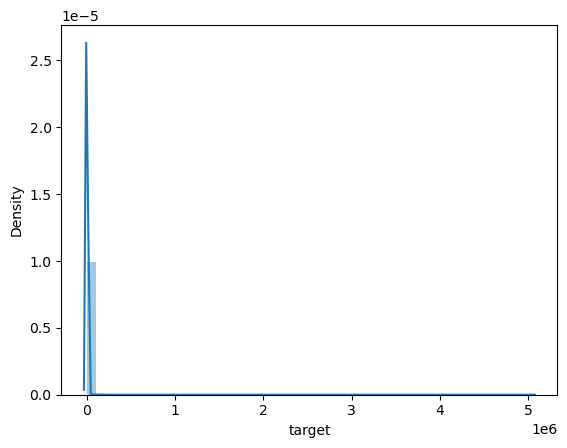

In [122]:
sns.distplot(data['target'])

<Axes: xlabel='target_wins_89.5%', ylabel='Density'>

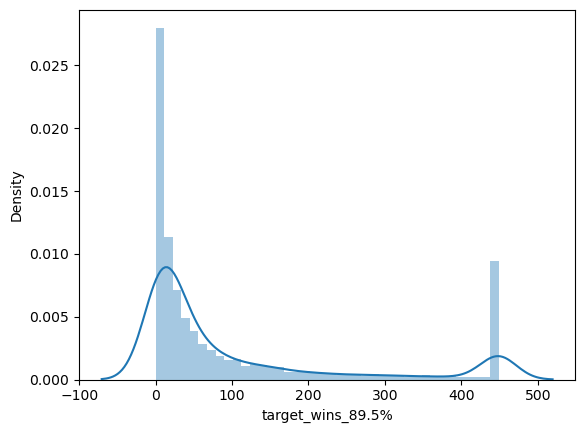

In [161]:
sns.distplot(data_out['target_wins_89.5%'])

In [160]:
data_out = outlier_removal_IQR(full_data)
data_out

477.1060860488395
-345.0775302423352
89.5% quantile:    448.82901734369085
90% quantile:    479.26420050478976
92.5% quantile:  695.169908221103
95% quantile:    1092.7361019040472
97.5% quantile:  2833.3953294732582
99% quantile:    7671.623095886942
99.9% quantile:  137717.46359598194


,smiles,fingerprint,target,fingerprint_0,fingerprint_1,fingerprint_2,fingerprint_3,fingerprint_4,fingerprint_5,fingerprint_6,...,fingerprint_1015,fingerprint_1016,fingerprint_1017,fingerprint_1018,fingerprint_1019,fingerprint_1020,fingerprint_1021,fingerprint_1022,fingerprint_1023,target_wins_89.5%
0,Cc1ccc(C2(CN3CCC(NC(=O)c4cc[nH]n4)CC3)CCCCC2)cc1,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",45.35,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,45.35
1,Cc1c(C(C)C)c(=O)on1C(=O)N1C(C)CCC1C,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15.09,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,15.09
2,COc1cc(OC)cc(-c2cn(-c3ccc(O)c(C(=O)Nc4cccc(C(=...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",36.88,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.88
3,C=C(C)C1C2C(C)CCC2C2(C)CCC12,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",71.59,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,71.59
4,C=CC(C)(C=Cc1ccc(Nc2ccccc2)cc1)CCC=C(C)C,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1606.96,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,448.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,CC(=O)N1CCC2(CN(CC3CCCC3)C2)C1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.65,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,5.65
8996,O=C(CN1CCCCC1)n1c2ccccc2c2ccccc21,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",50.43,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,50.43
8997,CC1CCN(CCCCCCOc2nc(-c3ccccc3)nc3c2CCCC3)CC1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",296.93,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,296.93
8998,O=C(O)C1CCN(c2ccccc2[N+](=O)[O-])CC1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.66,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6.66


In [140]:
data_x = data_out.iloc[:,3:-1]
data_x

,fingerprint_0,fingerprint_1,fingerprint_2,fingerprint_3,fingerprint_4,fingerprint_5,fingerprint_6,fingerprint_7,fingerprint_8,fingerprint_9,...,fingerprint_1014,fingerprint_1015,fingerprint_1016,fingerprint_1017,fingerprint_1018,fingerprint_1019,fingerprint_1020,fingerprint_1021,fingerprint_1022,fingerprint_1023
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8996,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [141]:
data_y = data_out.iloc[:,-1]
data_y

0       45.35
1       15.09
2       36.88
3       71.59
4      479.24
        ...  
8995     5.65
8996    50.43
8997   296.93
8998     6.66
8999   473.66
Name: target_wins_90%, Length: 9000, dtype: float64

<Axes: xlabel='target_wins_90%', ylabel='Density'>

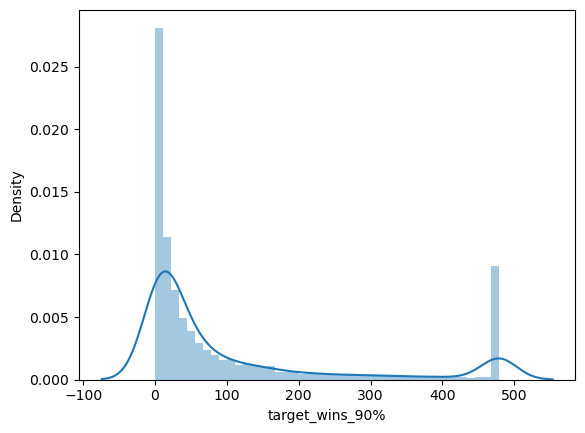

In [142]:
sns.distplot(data_y)

target    Axes(0.125,0.786098;0.352273x0.0939024)
dtype: object

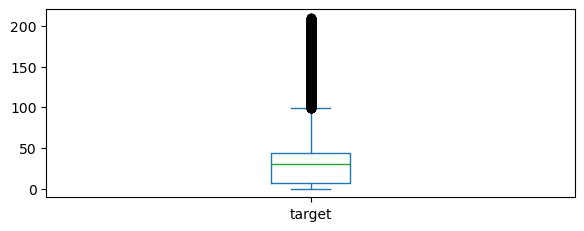

In [107]:
data_out['target'].plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

In [43]:
process = Preprocess(full_data[['fingerprint_0','target']])
data_ys = process.do_DataScaling(scaler='normalization')

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

reg = RandomForestRegressor()
lin = LinearRegression()
lasso = linear_model.Lasso()
ridge = linear_model.BayesianRidge()
elas = ElasticNet(random_state=0)
scores = cross_val_score(reg, data_x, data_y, cv=5, scoring='r2')

# Results
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

R2: 0.54 (+/- 0.04)


In [ ]:
        if compare == True:
            header = []
            x_train = []
            y_train = []
            x_test = []
            y_test = []
            y_pred = []
            for model in models:
                r2 = 0
                X_train_b = []
                X_test_b = []
                y_train_b = []
                y_test_b = [] 
                pred_y = []
                for train_index, test_index in cross_val.split(data_x, data_y):
                    train_x, test_x = data_x.iloc[train_index], data_x.iloc[test_index]
                    train_y, test_y = data_y.iloc[train_index], data_y.iloc[test_index]

                    model.fit(train_x, train_y)
                    test_pred_y = model.predict(test_x)
                    pred_y_ = model.predict(predict_data)
                    if r2 < r2_score(test_y, test_pred_y):
                        X_train_b = []
                        X_test_b = []
                        y_train_b = []
                        y_test_b = [] 
                        pred_y= []
                        X_train_b.append(train_x)
                        X_test_b.append(test_x)
                        y_train_b.append(train_y)
                        y_test_b.append(test_y)         
                        pred_y.append(pred_y_)
                x_train.append(X_train_b)
                header.append((model, 'x_train'))
                x_test.append(X_test_b)
                header.append((model, 'x_test'))
                y_train.append(y_train_b)
                header.append((model, 'y_train'))
                y_test.append(y_test_b)  
                header.append((model, 'y_test'))       
                y_pred.append(pred_y)
                header.append((model, 'y_pred'))
            print(x_train, y_train, x_test, y_test, y_pred, header)
            results = pd.DataFrame([np.transpose(x_train), np.transpose(y_train), np.transpose(x_test), np.transpose(y_test), np.transpose(y_pred[0])])
            return results  

In [8]:
import numpy as np
list(np.linspace(0.00001, 100, num=10))

[1e-05,
 11.11112,
 22.22223,
 33.33334000000001,
 44.44445,
 55.55556,
 66.66667000000001,
 77.77778,
 88.88889,
 100.0]

In [ ]:
from dash import Dash, dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree, neighbors
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold


app = Dash(__name__)
models = {'Regression': linear_model.LinearRegression,
          'BayesianRidge': linear_model.BayesianRidge,}

app.layout = html.Div([
    html.H4("Target prediction"),
    html.P("Select model:"),
    dcc.Dropdown(
        id='dropdown',
        options=["Regression", "BayesianRidge"],
        value="Regression",
        clearable=False
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"), 
    Input('dropdown', "value"))
def train_and_display(name):
    r2 = 0
    X_train_b = []
    X_test_b = []
    y_train_b = []
    y_test_b = [] 
    pred_y = []
    test_y_pred = []
    kf = KFold(n_splits=3, random_state=42, shuffle=True)
    for train_index, test_index in kf.split(data_x, np.log(data_y_NoOut)):
        X_train, X_test = data_x.iloc[train_index], data_x.iloc[test_index]
        y_train, y_test = np.log(data_y_NoOut).iloc[train_index], np.log(data_y_NoOut).iloc[test_index]

        model = models[name]()
        model.fit(X_train, y_train)
        y_range = model.predict(X_test)
        if r2 < r2_score(y_test, y_range):
            X_train_b = []
            X_test_b = []
            y_train_b = []
            y_test_b = [] 
            pred_y=[]
            test_y_pred = []
            X_train_b.append(X_train)
            X_test_b.append(X_test)
            y_train_b.append(y_train)
            y_test_b.append(y_test)         
            pred_y.append(y_range)
            test_y_pred.append(X_test)

    fig = go.Figure([
        go.Scatter(x=X_train_b[0].iloc[:,1]-0.01, y=y_train_b[0], 
                   name='train', mode='markers'),
        go.Scatter(x=X_test_b[0].iloc[:,1], y=y_test_b[0], 
                   name='test', mode='markers'),
        go.Scatter(x= X_test_b[0].iloc[:,1]+0.01, y=y_range, 
                   name='prediction', mode='markers')
    ])
    fig.update_layout(
        autosize=False,
        width=1000,
        height=1000)
    return fig

app.run_server(debug=False)